<a href="https://colab.research.google.com/github/shobhitatiwari/Data-science/blob/master/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving QualityPrediction.csv to QualityPrediction.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("QualityPrediction.csv")

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
print(df.shape,'\n')
print(df.info(),'\n')

(1599, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 



In [ ]:
df.isna().sum()

#no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.quality.value_counts()

# target values:3 to 8
#check data biasness

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Bivariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


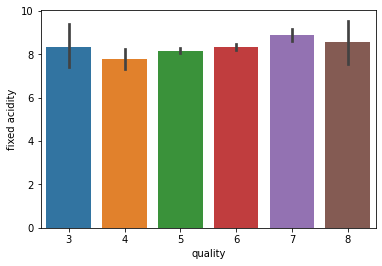

In [ ]:
sns.barplot(x='quality', y='fixed acidity', data=df)

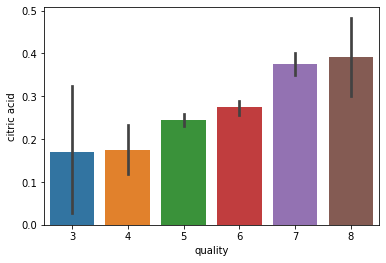

In [ ]:
sns.barplot(x='quality', y='citric acid', data=df)

#citric acid is increasing with quality

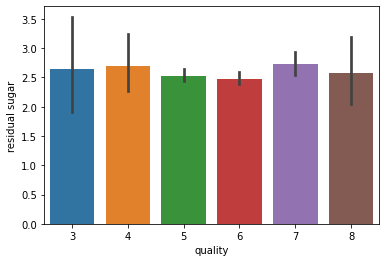

In [ ]:
sns.barplot(x='quality', y='residual sugar', data=df)

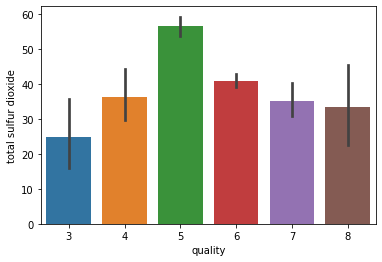

In [ ]:
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

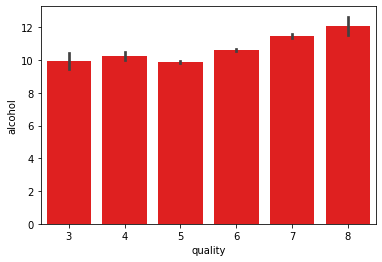

In [ ]:
sns.barplot(x='quality', y='alcohol', data=df, color='red')

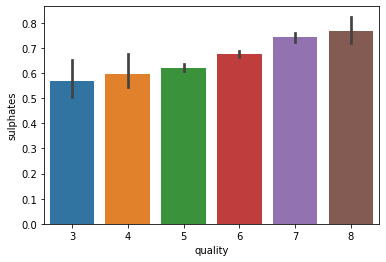

In [ ]:
sns.barplot(x='quality', y='sulphates', data=df)

#sulphates increasing with quality increasing

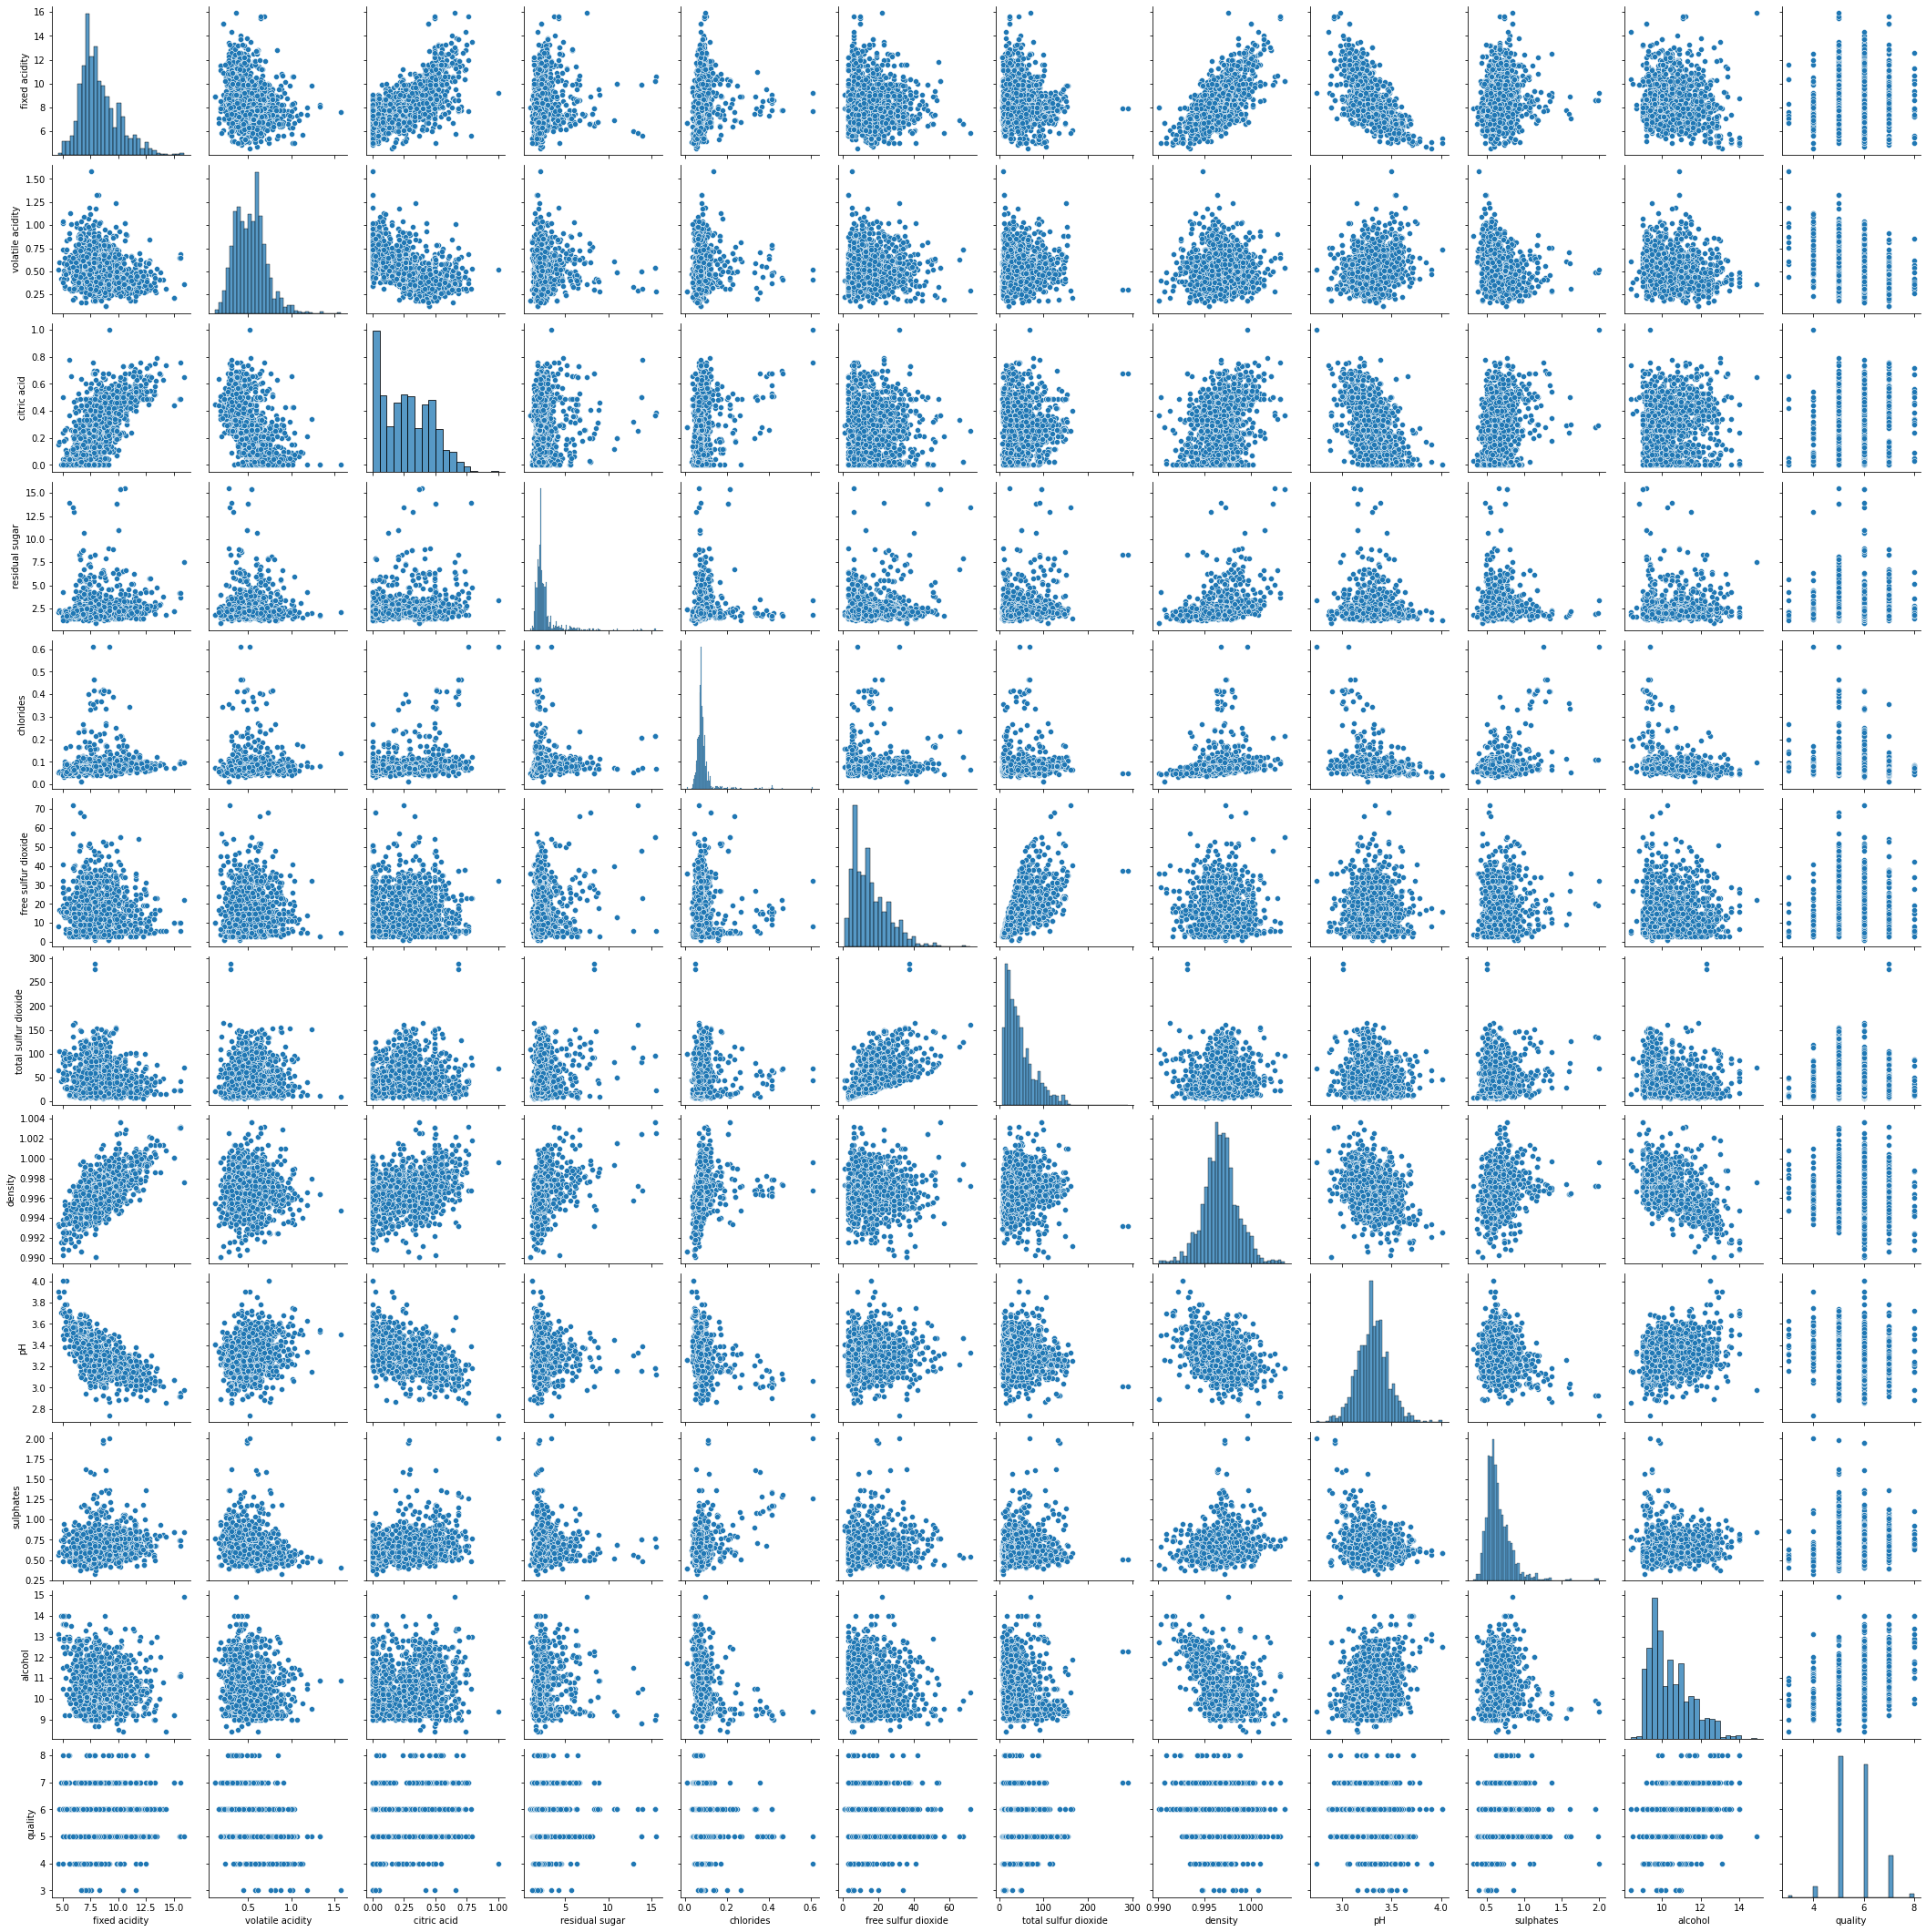

In [ ]:
sns.pairplot(df)

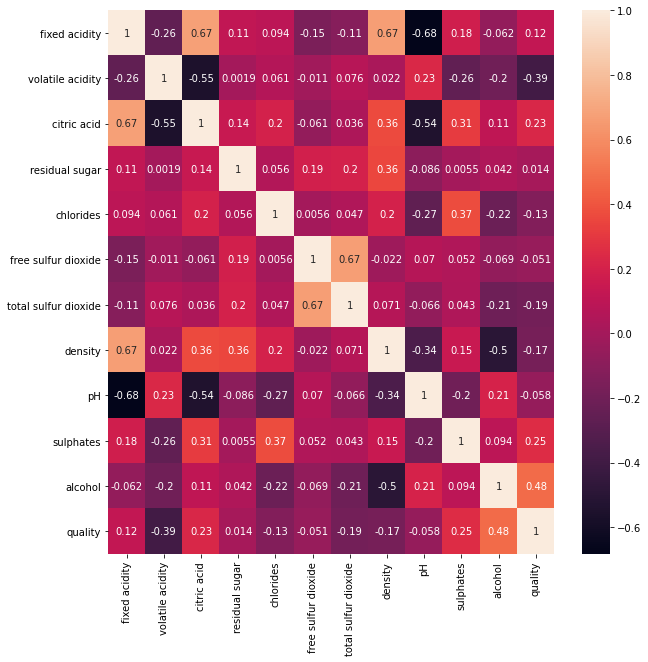

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, fmt='.2g')

#no significant correlation

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


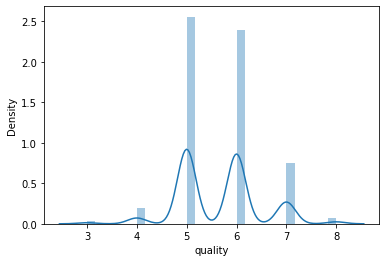

In [ ]:
sns.distplot(df['quality'])

**Data Preprocessing** 

In [ ]:
df['quality_new']=df['quality'].apply([lambda x: 'Good' if x>5 else 'Bad'])

In [ ]:
df['quality_new'].value_counts()

Good    855
Bad     744
Name: quality_new, dtype: int64

In [ ]:
#converting target variable to binary
from sklearn.preprocessing  import LabelEncoder

le=LabelEncoder()
df['quality_new']=le.fit_transform(df['quality_new'])

df['quality_new'].value_counts()

1    855
0    744
Name: quality_new, dtype: int64

In [ ]:
print(df.columns)

X=df.iloc[:,:11]
y=df.iloc[:,11]

print(X.shape)
print(y.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_new'],
      dtype='object')
(1599, 11)
(1599,)


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


In [ ]:
#Standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Modelling**

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42, oob_score=True)

In [ ]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rfc.score(X_train,y_train)

1.0

In [ ]:
rfc.oob_score_

0.6788048552754435

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
#checking accuracy
print("accuracy of test dataset: ",metrics.accuracy_score(y_test, y_pred))
print('\n')
print("confusion matrix: \n",metrics.confusion_matrix(y_test, y_pred))


accuracy of test dataset:  0.6420454545454546


confusion matrix: 
 [[  0   0   2   0   0   0]
 [  0   0  10   9   0   0]
 [  0   0 164  50   3   0]
 [  0   0  50 145  18   0]
 [  0   0   0  40  29   1]
 [  0   0   0   1   5   1]]


Hyperparameter Tuning by
**Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
import time


In [ ]:
#train test split again , for Grid search CV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rfc_ht=RandomForestClassifier(random_state=42, oob_score=True)

y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [ ]:
y_train.value_counts()

quality
5          551
6          506
7          157
4           43
8           13
3            9
dtype: int64

In [ ]:
np.random.seed(42)
start=time.time()

model_param=  { 'bootstrap':[True,False],
              'criterion':['gini', 'entropy'], 
              'max_depth':[2,3,4],
              'max_features':['auto','sqrt','log2','None']    
}

rfc_gcv=GridSearchCV(rfc_ht, model_param, n_jobs=3)#, cv=10)
rfc_gcv.fit(X_train, y_train)

end=time.time()
print("Best parameters using Grid seach cv: ", rfc_gcv.best_params_)
print("\n")
print("Time taken: {}".format(end-start))

Best parameters using Grid seach cv:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}


Time taken: 20.938212633132935


In [ ]:
#Set best params
rfc_ht.set_params(criterion = 'entropy', max_depth=4, max_features= 'auto')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

n-estimators , using OOB rate

In [ ]:
rfc_ht.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 150
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rfc_ht.set_params(n_estimators=i)
    rfc_ht.fit(X_train, y_train)

    oob_error = 1 - rfc_ht.oob_score_
    error_rate[i] = oob_error

ValueError: ignored

In [ ]:
# Convert dictionary to a pandas series for easy plotting 

oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 101 to 500 trees)')

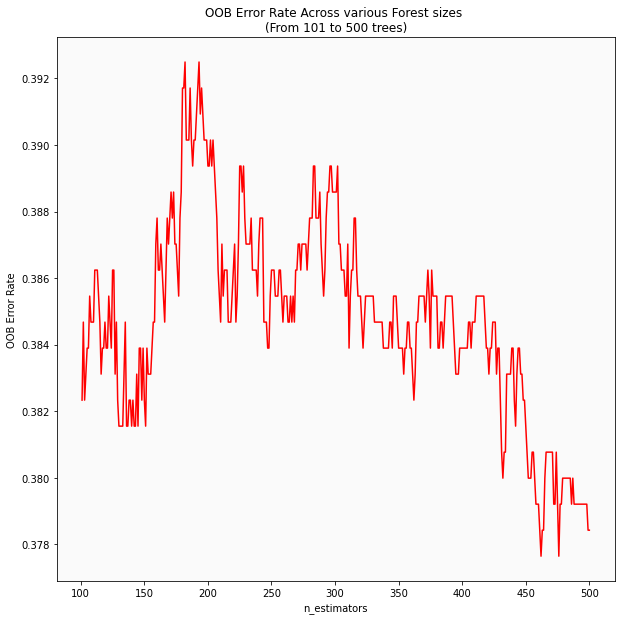

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
# plt.axhline(0.055, linestyle='--')
# plt.axhline(0.05, linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 101 to 500 trees)')

In [ ]:
print('OOB Error rate for 450 trees is: {0:.5f}'.format(oob_series[150])) #tried 150, 430,450, 470

OOB Error rate for 450 trees is: 0.38233


In [ ]:
# Refine the tree via OOB Output
rfc_ht.set_params(n_estimators=150,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rfc_ht.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_ht=rfc_ht.predict(X_test)

In [ ]:
#Accuracy

print("accuracy of test dataset: ",metrics.accuracy_score(y_test, y_pred_ht))
print('\n')
print("confusion matrix: \n",metrics.confusion_matrix(y_test, y_pred_ht))
print('\n')
print(rfc_ht.oob_score_)

accuracy of test dataset:  0.571875


confusion matrix: 
 [[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 102  28   0   0]
 [  0   0  54  76   2   0]
 [  0   0   0  37   5   0]
 [  0   0   0   4   1   0]]


0.6215793588741204


In [ ]:
rfc_ht.feature_importances_

array([0.04276809, 0.10850084, 0.04170465, 0.03241065, 0.03133181,
       0.02238879, 0.12559557, 0.08592859, 0.02600008, 0.15513779,
       0.32823314])



*   Tried different splitting criteria , and different n-estimatoe values, since accuracy is too low

Lets try other model:

**Decision Tree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree -depth 2
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(X_train,y_train)

model_dt_2_score_train = model_dt_2.score(X_train,y_train)

model_dt_2_score_test = model_dt_2.score(X_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.5590304925723222
Testing Score 0.53125


In [ ]:
# Decision tree -depth 4
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(X_train,y_train)

model_dt_4_score_train = model_dt_4.score(X_train,y_train)

model_dt_4_score_test = model_dt_4.score(X_test,y_test)

print('Training Score',model_dt_4_score_train)

print('Testing Score',model_dt_4_score_test)


Training Score 0.6356528537920251
Testing Score 0.53125


In [ ]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(X_train,y_train)

model_dt_8_score_train = model_dt_8.score(X_train,y_train)

model_dt_8_score_test = model_dt_8.score(X_test,y_test)

print('Training Score',model_dt_8_score_train)

print('Testing Score',model_dt_8_score_test)

Training Score 0.8076622361219703
Testing Score 0.5625


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_svm))

Accuracy Score:
0.56875


In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_svm))

Accuracy Score:
0.5


In [ ]:
y_arr=y.values.ravel()

In [ ]:
gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
acc_score = []
for g in gamma_range:
    svc = SVC(kernel='rbf',gamma=g)
    scores = cross_val_score(svc,X,y_arr,cv=5,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.49528605015673977, 0.4977978056426332, 0.5065732758620689, 0.4940478056426332, 0.4515301724137931, 0.42651645768025076, 0.42839145768025083]


In [ ]:
C_range = list(np.arange(0.1,2,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc,X,y_arr,cv=5,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.5678722570532916, 0.5709972570532915, 0.5697452978056426, 0.5691242163009405, 0.5678722570532916, 0.5703742163009405, 0.5722492163009404, 0.5734992163009405, 0.5716242163009404, 0.5716242163009404, 0.5728742163009405, 0.5722492163009404, 0.5722492163009404, 0.5728742163009405, 0.5716222570532915, 0.5703722570532916, 0.5703722570532914, 0.5703722570532914, 0.5709972570532915]
